### Import the Necessary Libraries :

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [353]:
import os
import pandas as pd

home_directory = os.path.expanduser("~")

relative_path = 'Downloads/heart.csv.xls'

absolute_path = os.path.join(home_directory, relative_path)

data = pd.read_csv(absolute_path, encoding='latin-1')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

### Інформація про дані:

In [354]:
data.shape

(918, 12)

In [355]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


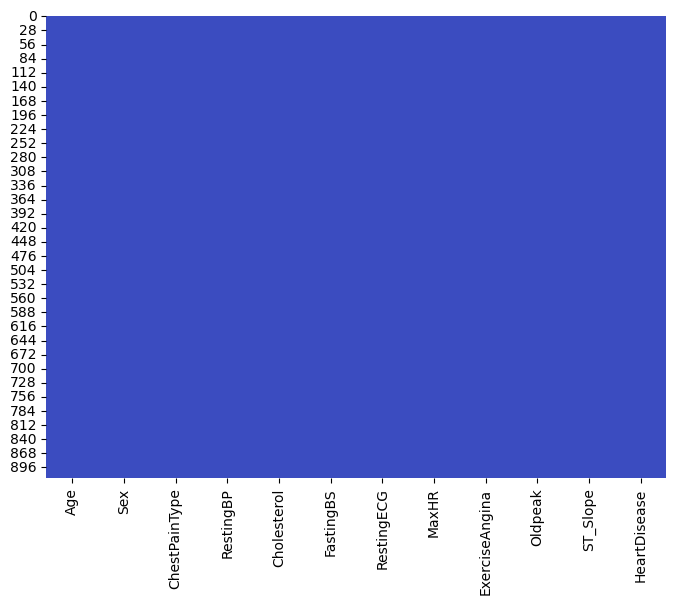

In [357]:
plt.figure(figsize=(8, 6))  
sns.heatmap(data.isnull(), cmap='coolwarm', cbar=False)
plt.show()

- **У даних немає нульових значень**

In [358]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

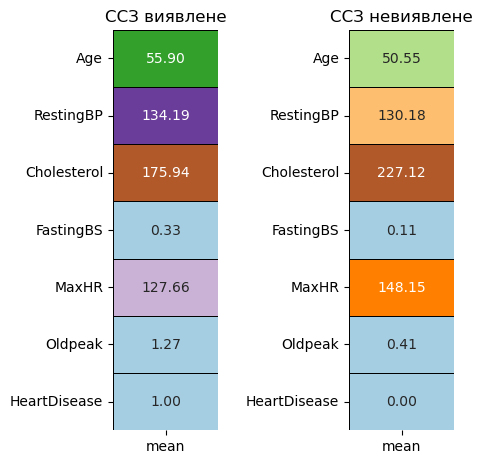

In [359]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = sns.color_palette("Paired")

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('ССЗ виявлене');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('ССЗ невиявлене');

fig.tight_layout(pad = 2)

- **Середні** значення всіх ознак для випадків наявності та відсутності серцевих-судинних захворювань.

### Поділ ознак на числові та категоріальні :

In [360]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Тут визначено категоріальні ознаки, якщо атрибут має менше 6 унікальних елементів, інакше це числова ознака.
- Типовий підхід для цього поділу ознак також може базуватися на типах даних елементів відповідного атрибута.

**Наприклад:** тип даних = ціле число, атрибут = числова ознака; тип даних = рядок, атрибут = категорійна функція

- Для цього набору даних, оскільки кількість функцій менша, ми також можемо перевірити набір даних вручну.

### Категориальні ознаки:

In [361]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- Створення глибокої копії вихідного набору даних і міток, що кодують текстові дані категорійних ознак.
- Зміни в оригінальному наборі даних не будуть виділені в цій глибокій копії.
– Тому використовуємо цю глибоку копію набору даних, у якій усі функції перетворено на числові значення для візуалізації та моделювання.

#### Розподіл категорійних ознак:

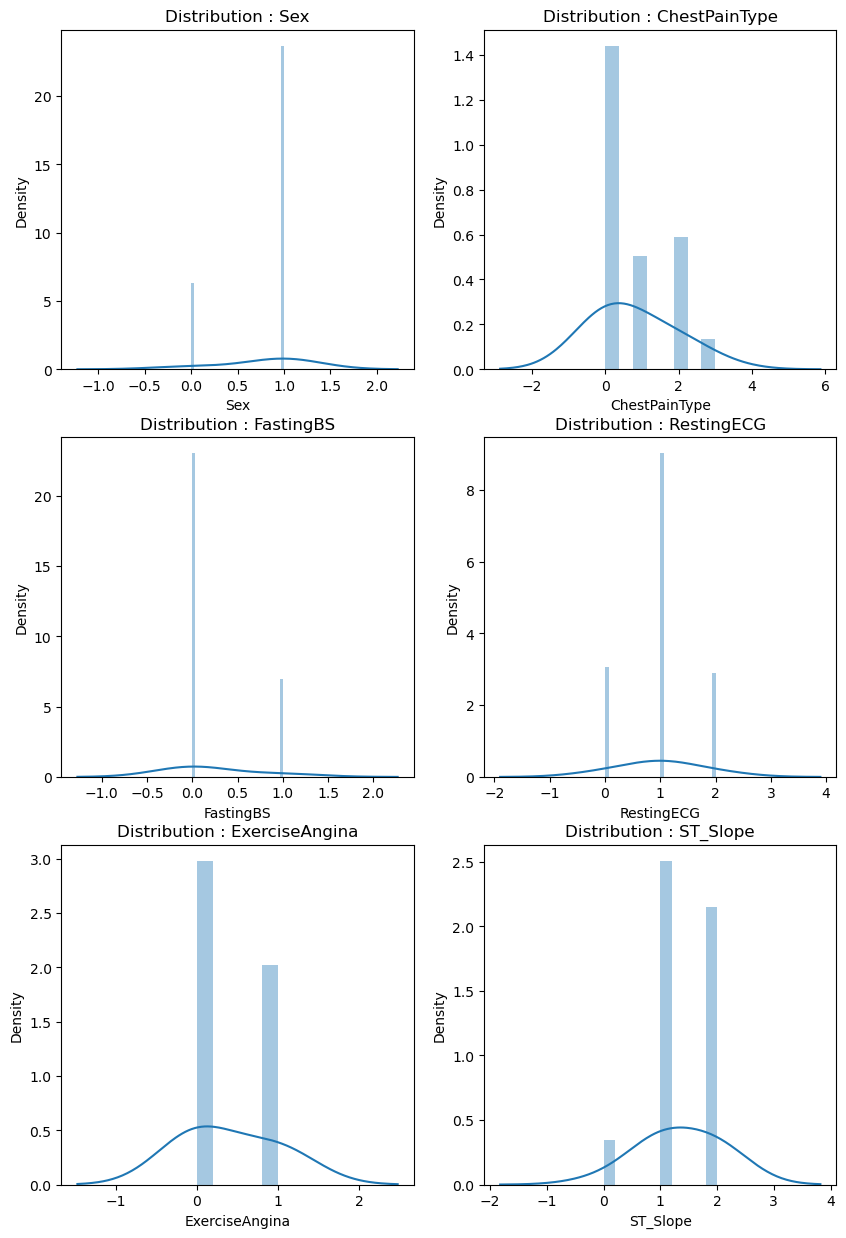

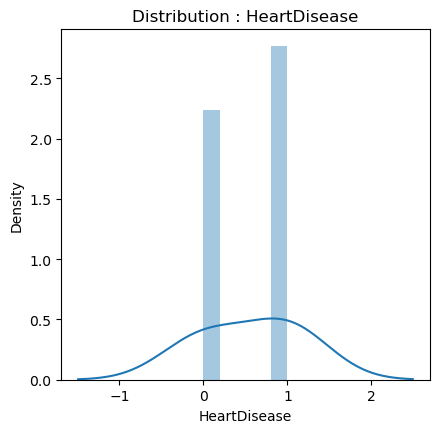

In [362]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- Усі категорійні характеристики приблизно **Нормально розподілені**.

### Числові характеристики:

#### Розподіл числових характеристик:

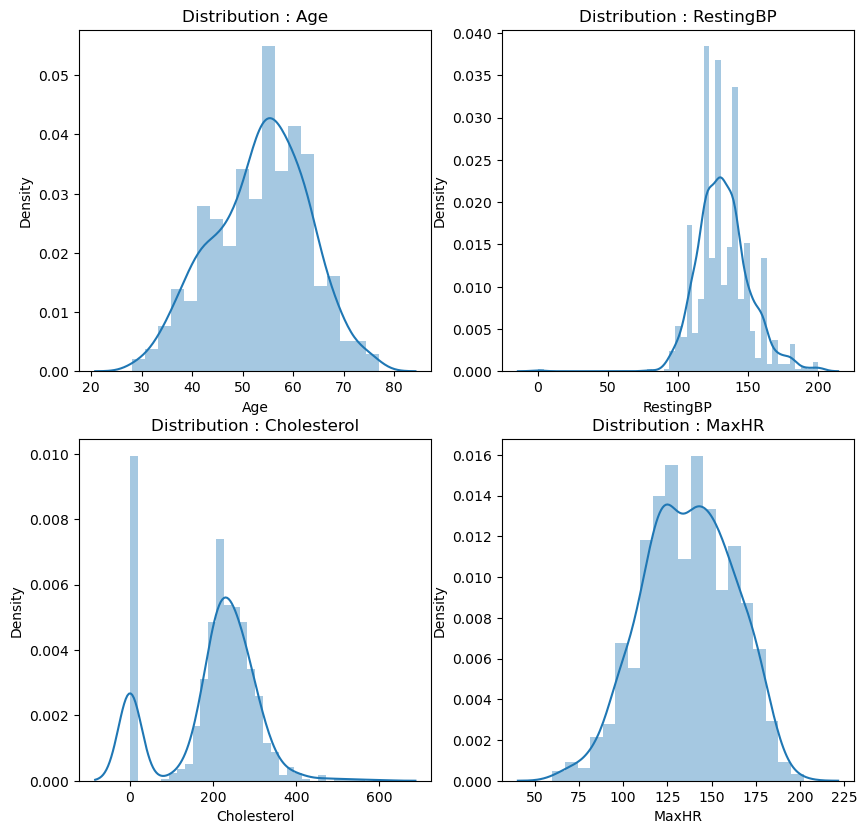

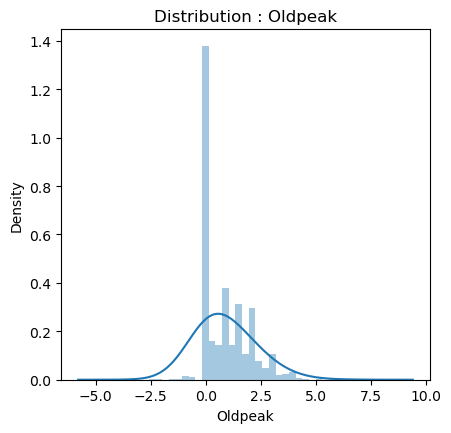

In [363]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

### Target Variable Visualization (HeartDisease) : 

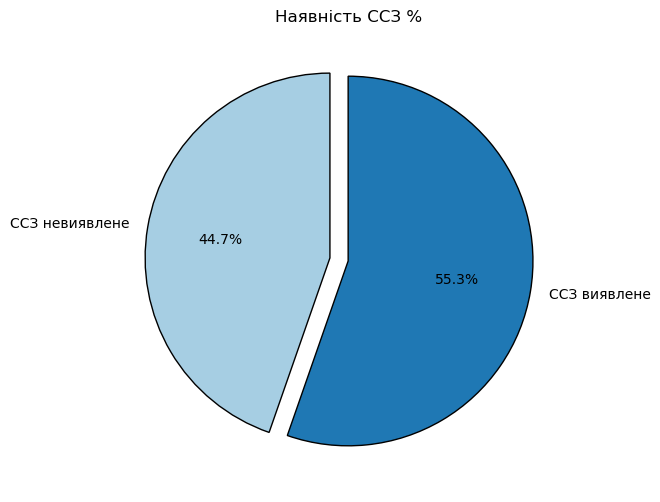

In [364]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

plt.figure(figsize=(8, 6))  
plt.pie(circle, labels=['ССЗ невиявлене', 'ССЗ виявлене'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Наявність ССЗ %')
plt.show()

### Категоричні ознаки проти цільової змінної (хвороби серця):

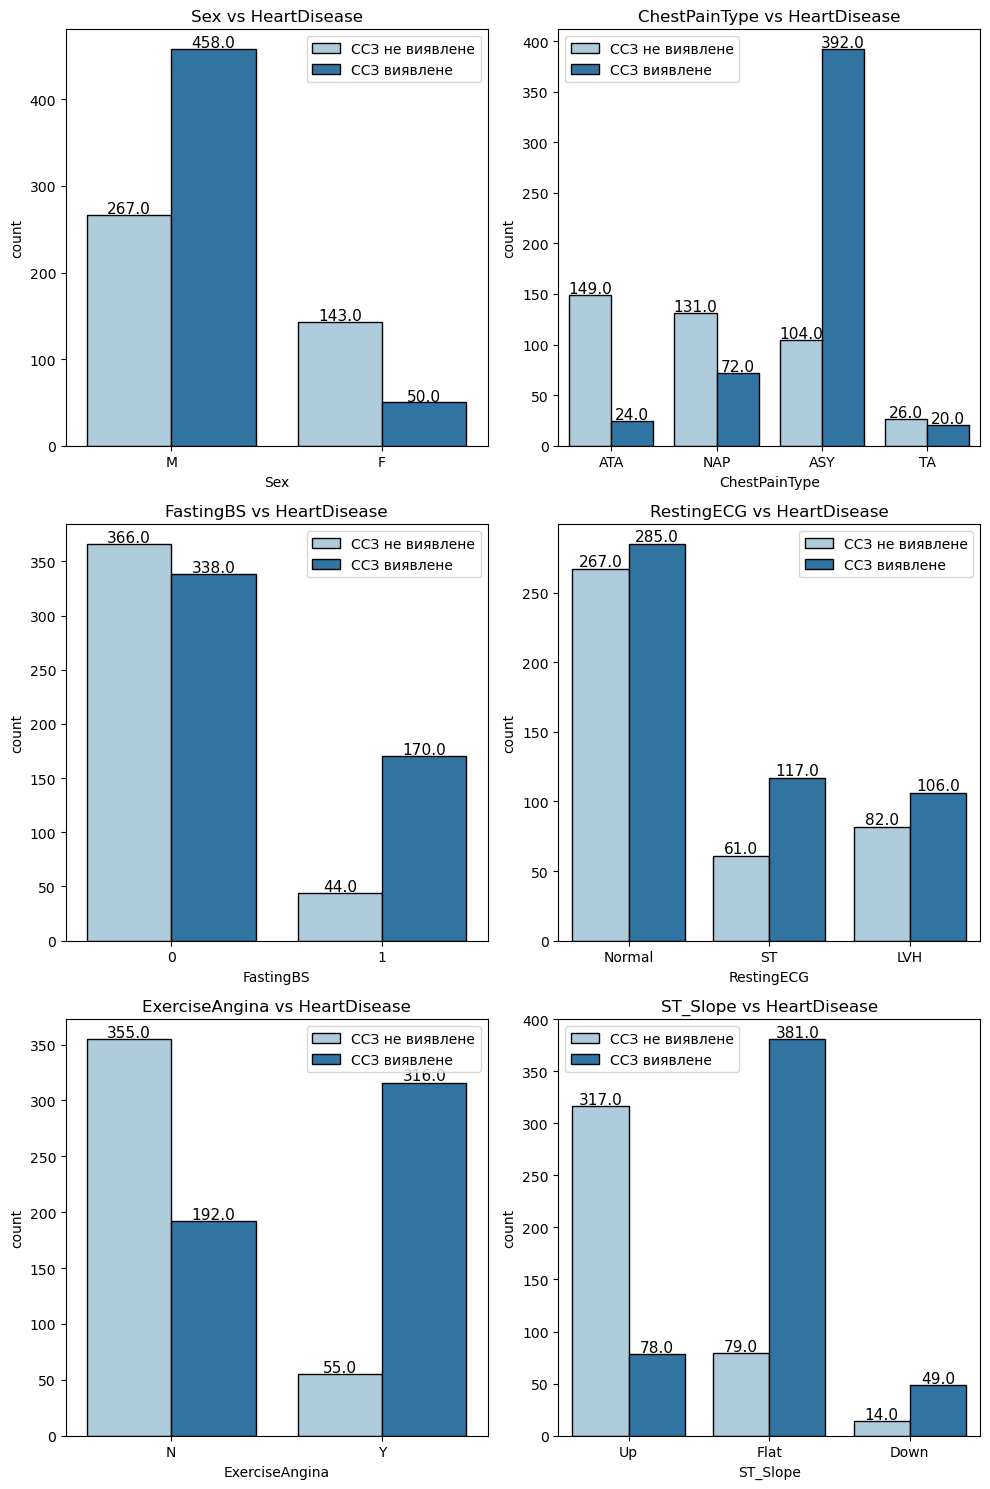

In [365]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    ax = axes.flatten()[i]
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), 
                horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs HeartDisease'
    ax.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    ax.set_title(title)

for j in range(len(categorical_features) - 1, 6):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

- **Чоловіче** населення має більше хворих на серцево-судинні захворювання, ніж жодне. У випадку **жіночого** населення пацієнтів із серцево-судинними захворюваннями менше, ніж без них.
- **ASY** тип болю в грудях сміливо вказує на велику ймовірність серцевих захворювань.
- **Цукор в крові натщесерце** - це складно! Пацієнти з діагнозом "цукор в крові натщесерце" і "без цукру в крові натщесерце" мають серйозні серцеві захворювання.
- **ЕКГ у спокої** не містить чіткої категорії, яка виділяє пацієнтів із захворюваннями серця. Усі 3 значення складаються з великої кількості пацієнтів із захворюваннями серця.
- **Енгіна, спричинена фізичним навантаженням** безумовно підвищує ймовірність діагностування серцевих захворювань.
- Зі значеннями **ST_Slope** **плоский** нахил відображає дуже високу ймовірність діагностування серцевої хвороби. **Униз** також показує той самий результат, але в дуже кількох точках даних.

### Категоричні ознаки проти позитивних випадків захворювання серця:

In [366]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

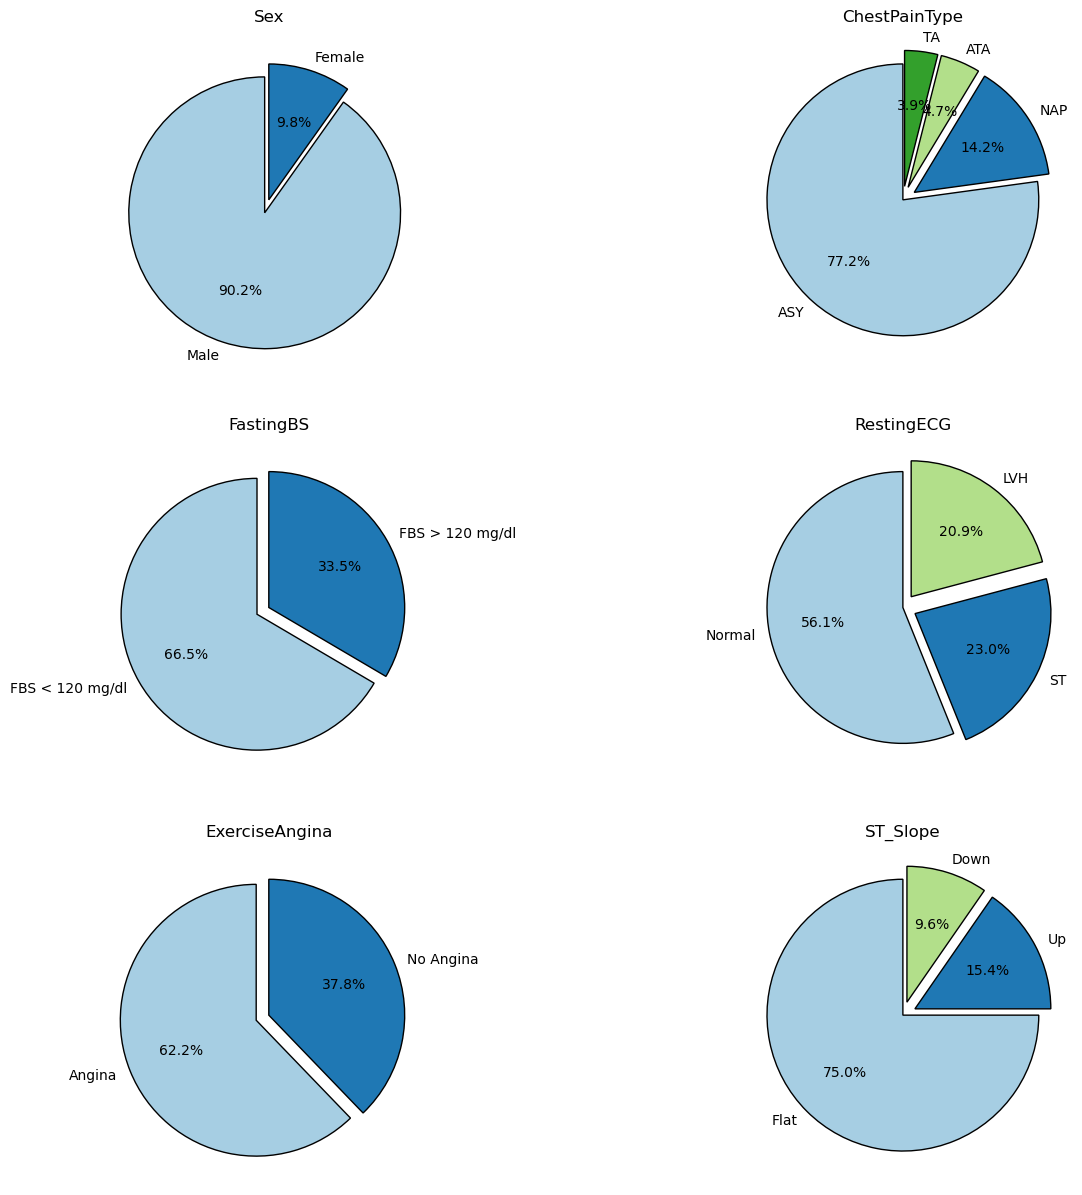

In [367]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

- З усіх пацієнтів із серцевими захворюваннями приголомшливі 90% пацієнтів — **чоловіки**.
- Коли справа доходить до типу болю в грудях, **ASY** тип займає більшість із 77%, що призводить до серцевих захворювань.
- **Рівень цукру в крові натщесерце** < 120 мг/дл свідчить про високі шанси серцевих захворювань.
- Для **ЕКГ спокою** рівень **Нормальний** становить 56% шансів серцевих захворювань, ніж рівні **ГЛШ** і **ST**.
- Виявлення **стенокардії, спричиненої фізичним навантаженням** також вказує на захворювання серця.
- Що стосується показників **ST_Slope**, рівень **Flat** містить величезну частину (75%), яка може допомогти у виявленні основних проблем із серцем.

### Числові характеристики проти цільової змінної (захворювання серця):

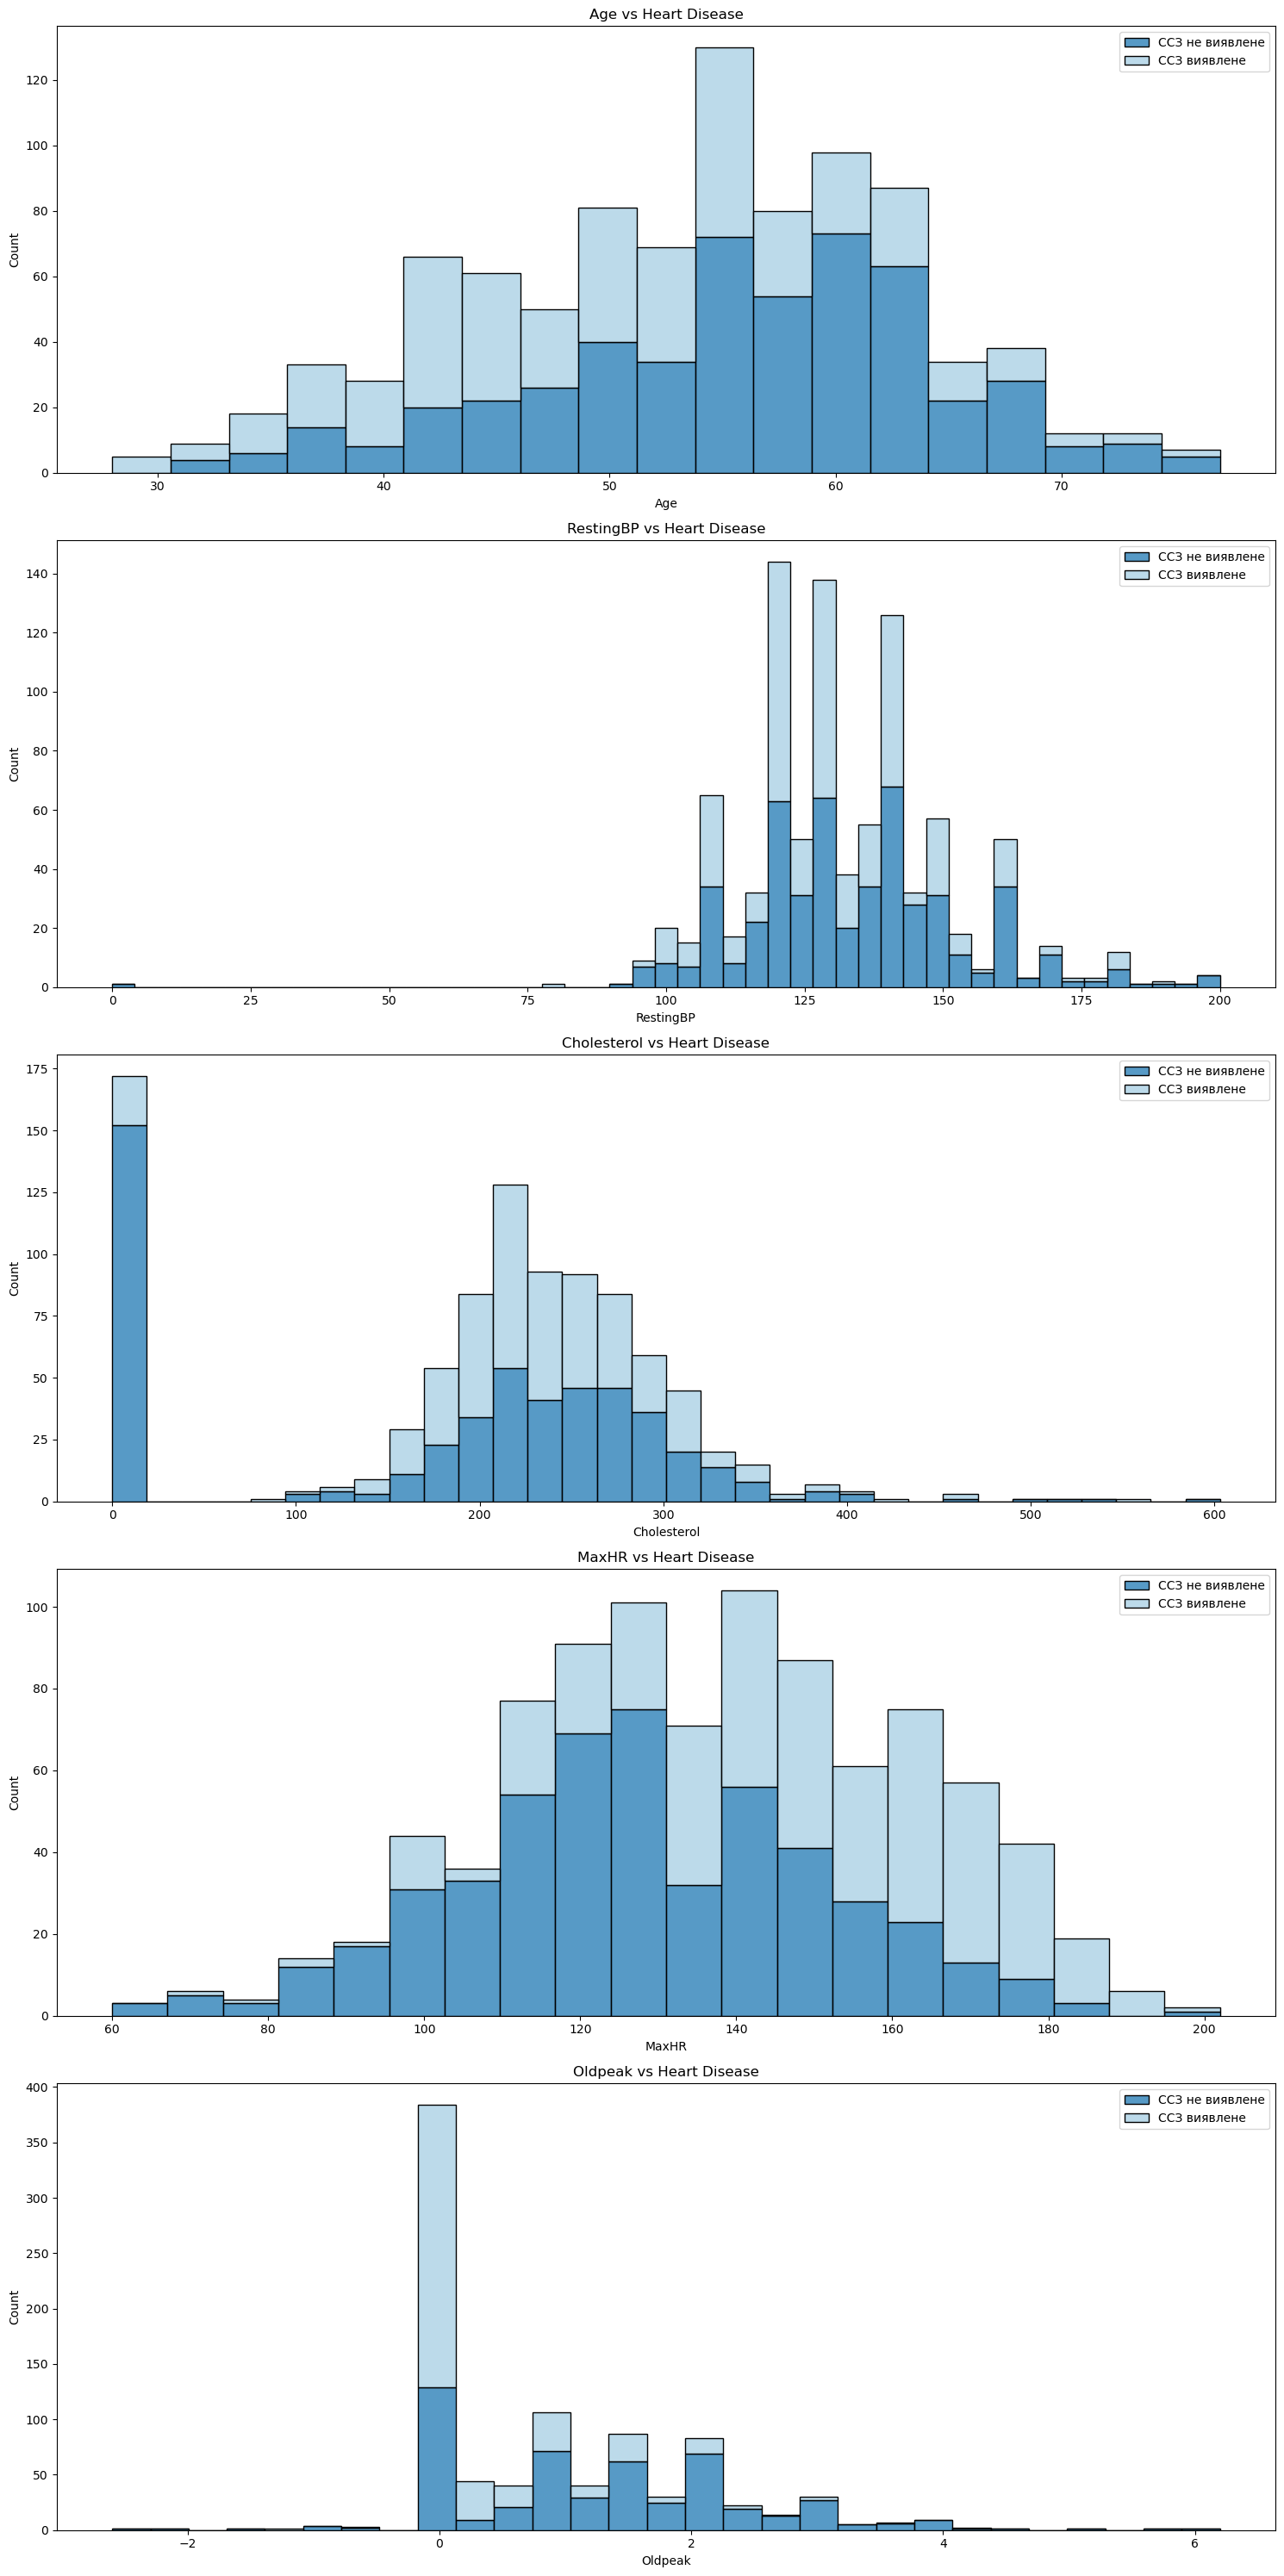

In [368]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))
for i in range(len(numerical_features)):
    plt.subplot(5, 1, i+1)
    sns.histplot(data=data, x=numerical_features[i], hue="HeartDisease", multiple="stack", palette=colors, ax=axes[i])
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    plt.title(title)
plt.tight_layout()
plt.show()

Через забагато унікальних точок даних у наведених вище функціях важко отримати будь-яку інформацію. Таким чином, ми перетворимо ці числові характеристики, окрім віку, у категоріальні ознаки для зрозумілої візуалізації та отримання інформації.
Таким чином, масштабуємо індивідуальні значення цих ознак. Це призводить до постійного значення різноманітних точок даних, яке представляє діапазон значень.
Тут ділимо точки даних числових ознак на 5 або 10 і призначаємо значення частки як репрезентативну константу для цієї точки даних. Константи масштабування 5 і 10 визначаються на основі даних і інтуїції.

In [369]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

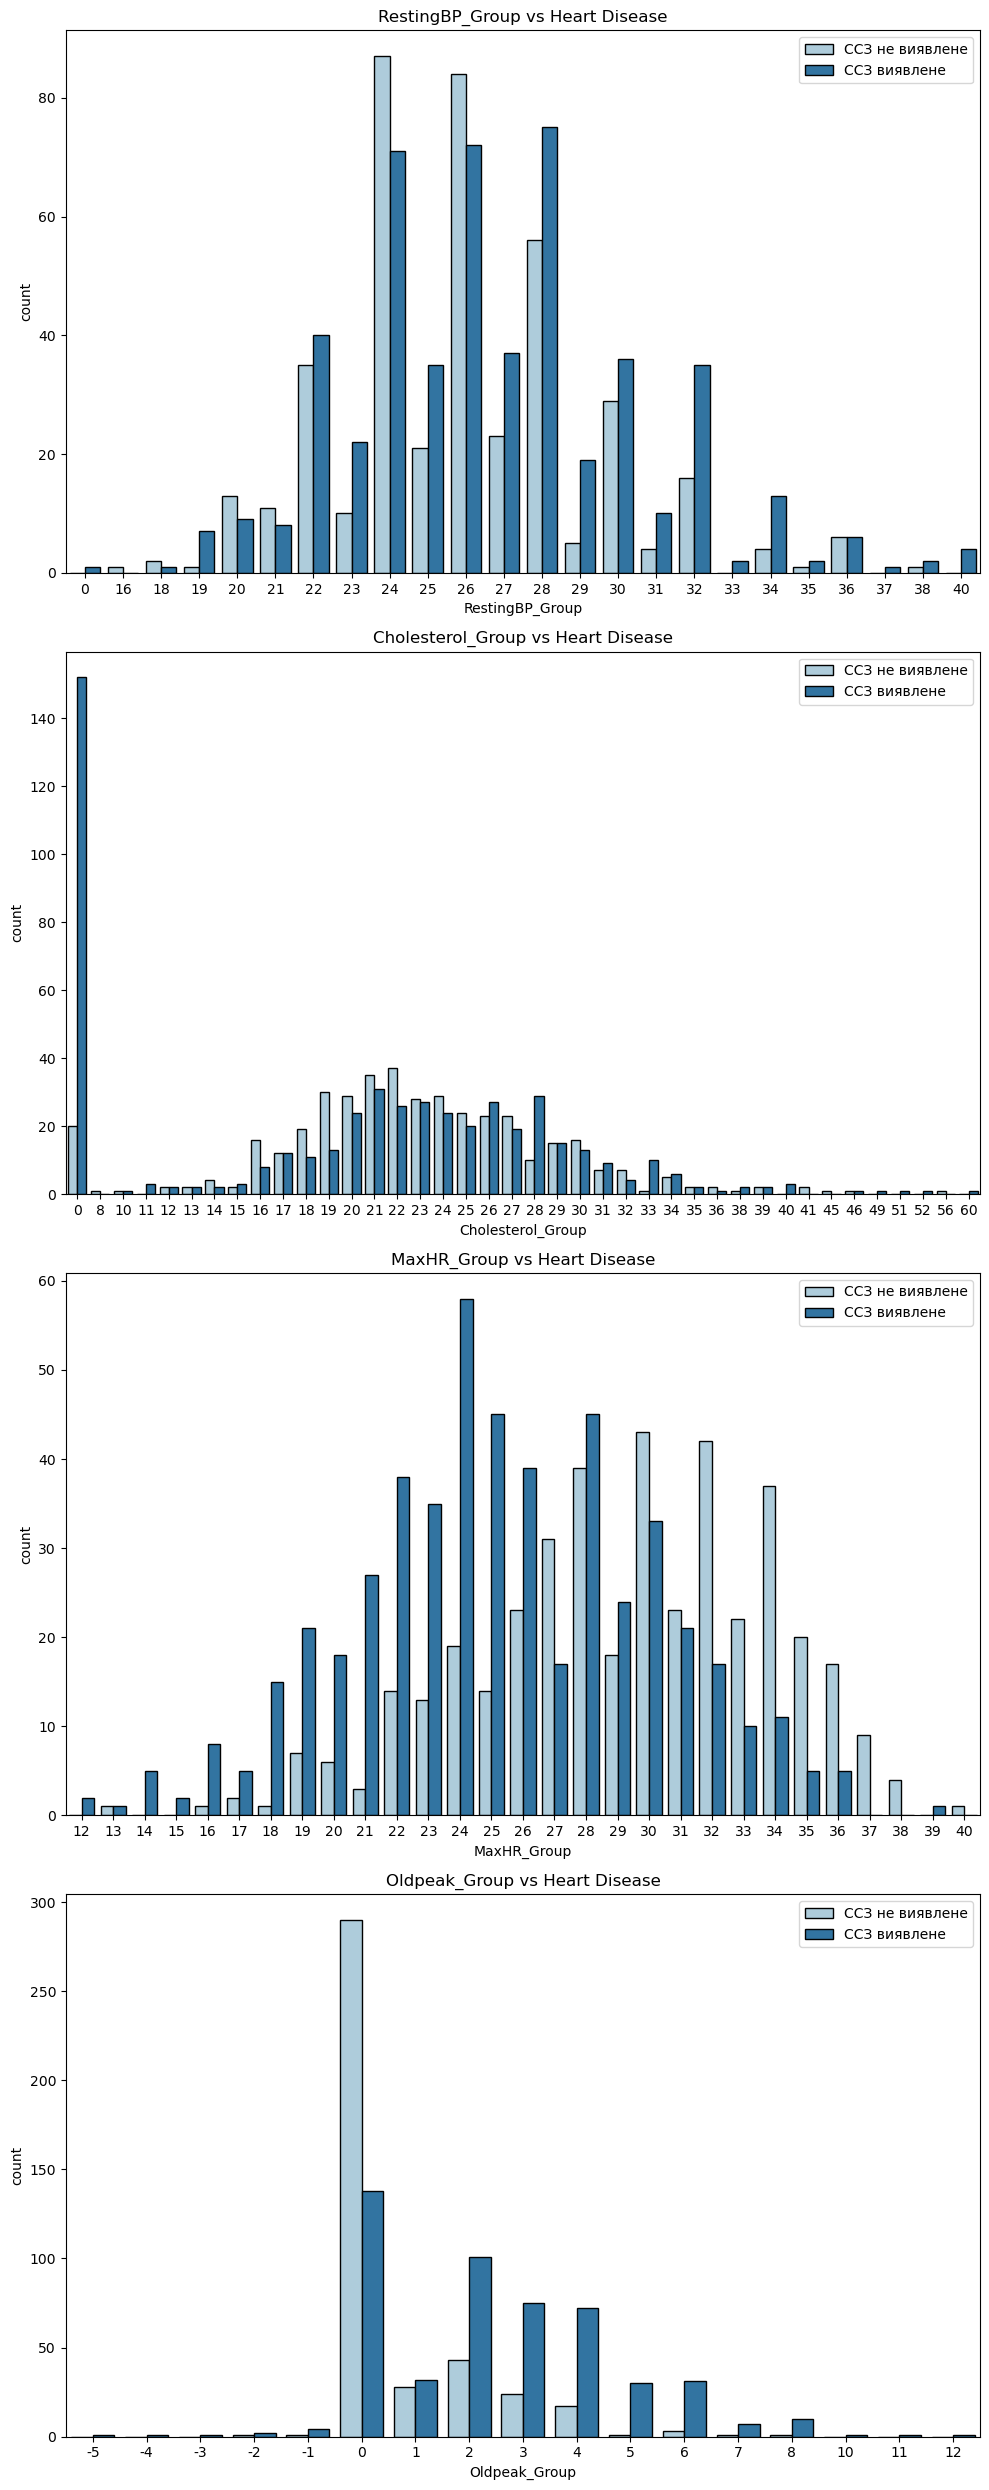

In [370]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i + 1)
    sns.countplot(x=group_numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)
plt.tight_layout()
plt.show()

- Згідно з даними групи **RestingBP**, показники **95** (19x5) - **170** (34x5) найбільш схильні до виявлення при захворюваннях серця.
- Рівень **холестерину** від **160** (16x10) до **340** (34x10) дуже сприйнятливий до захворювань серця.
- Що стосується показників **MaxHR**, захворювання серця виявляють у всіх даних, але значення **70** (14x5) - **180** (36x5) виявили багато випадків.
- Значення **Oldpeak** також відображають захворювання серця. **0** (0x5/10) - **4** (8x5/10) значення нахилу відображають високу ймовірність діагностування захворювань серця.

### Числові ознаки проти категоріальних ознак із цільовою змінною (захворювання серця):

#### Sex vs Numerical Features :

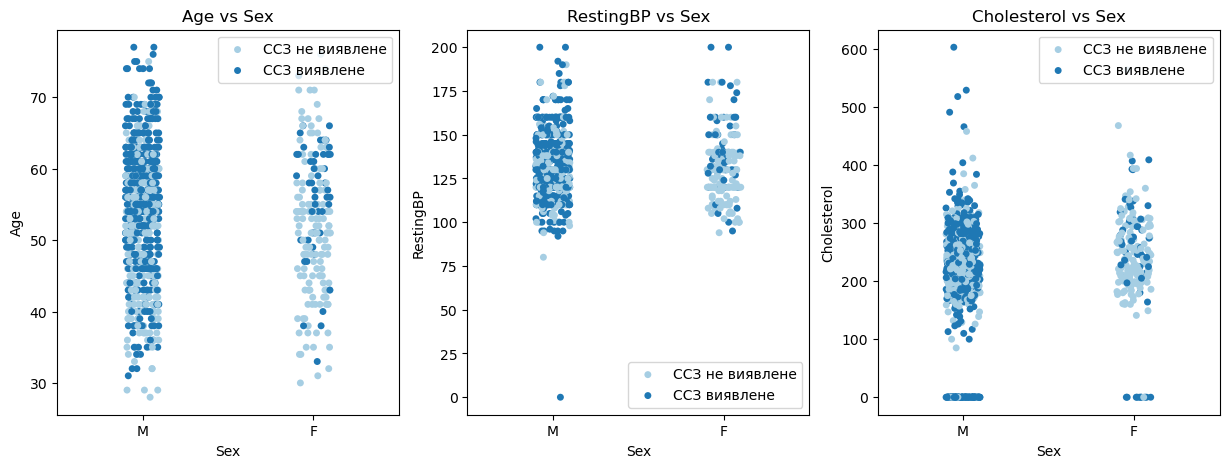

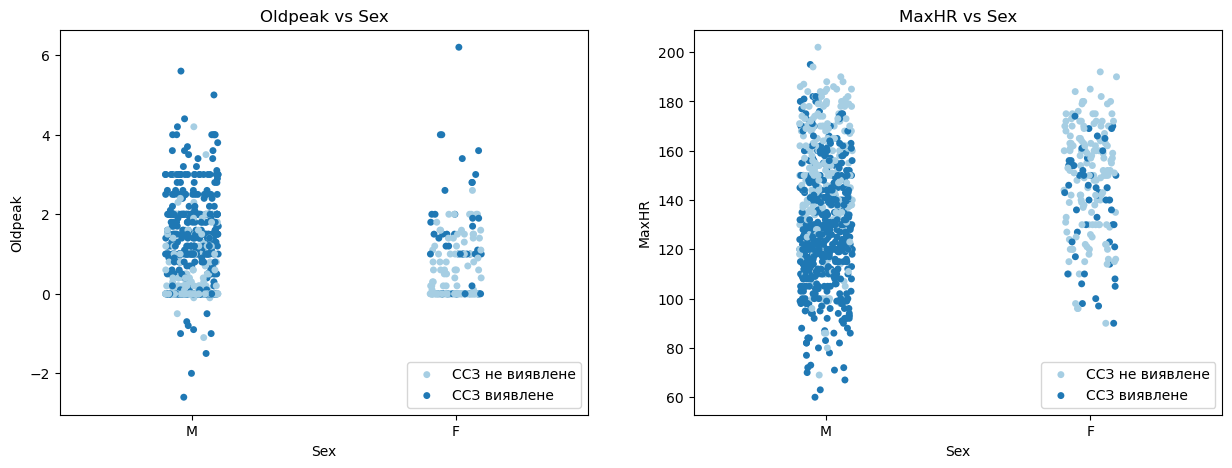

In [371]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

- **Чоловіча** популяція має захворювання серця майже на всіх значеннях числових ознак. У віці старше 50 років, позитивні старі пікові значення та максимальна частота серцевих скорочень нижче 140, хвороби серця у чоловічої популяції стають щільними.
- Дані про **жіноче** населення набагато менше порівняно з показниками **чоловічого** населення. Отже, ми не можемо вказати конкретні діапазони або значення, які відображають випадки захворювань серця.

#### ChestPainType vs Numerical Features :

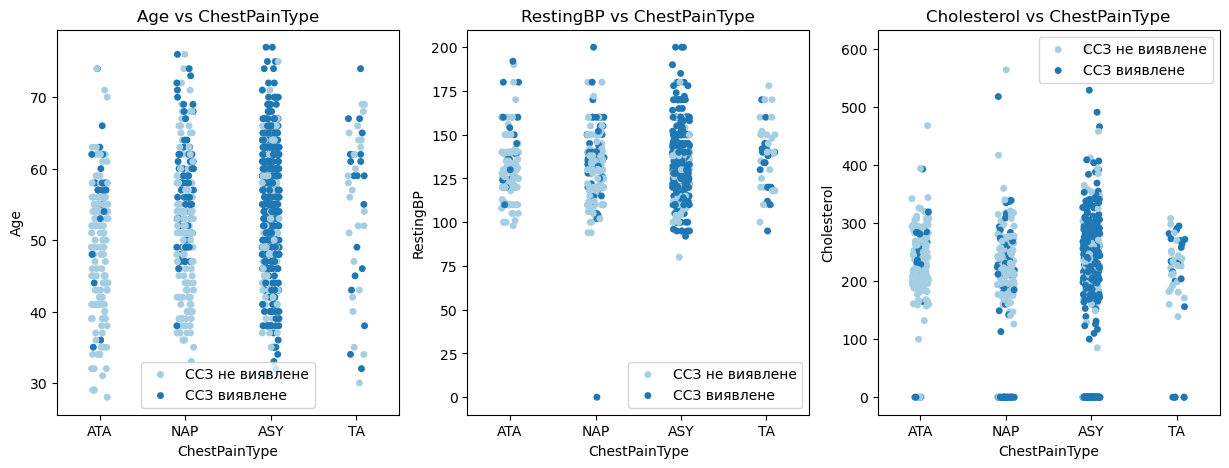

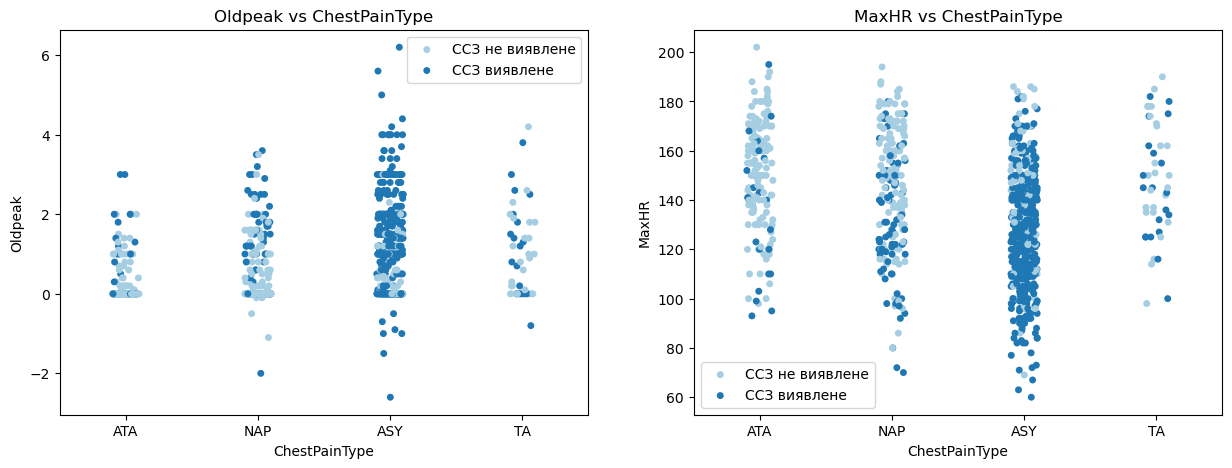

In [372]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

- **ASY** тип болю в грудях значно домінує над іншими типами болю в грудях за всіма числовими характеристиками.

#### FastingBS vs Numerical features :

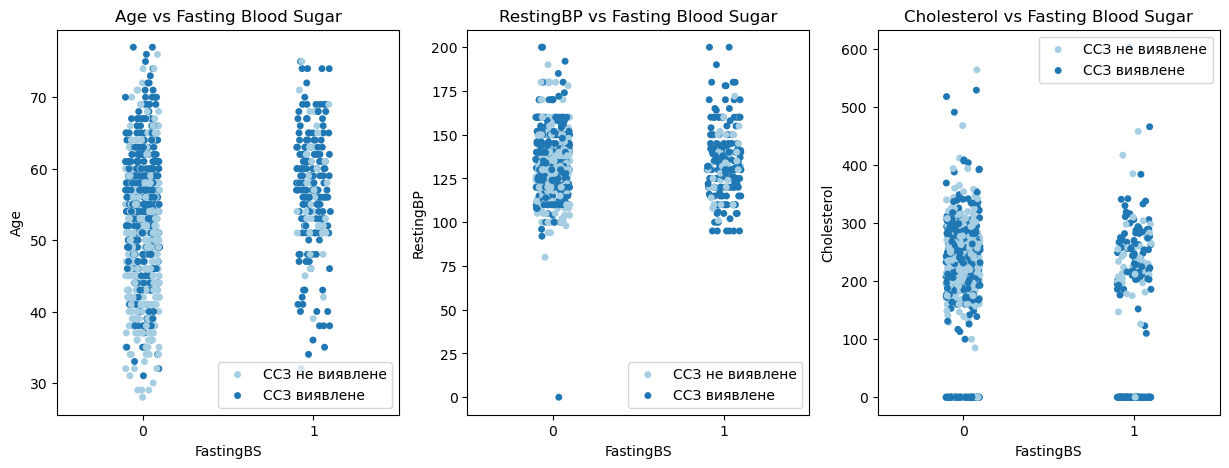

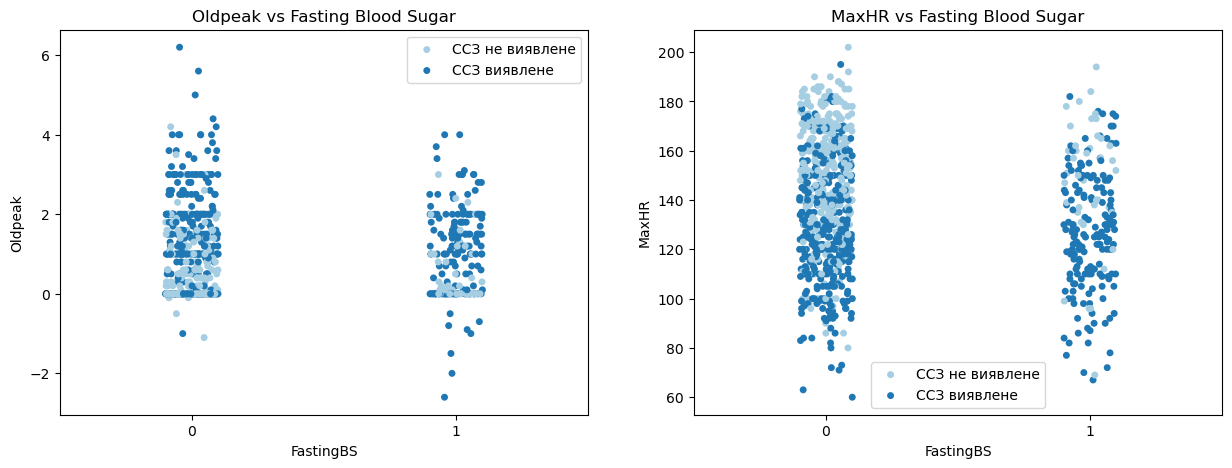

In [373]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

- Понад **віком** 50 років хвороби серця виявляють у всіх даних, незалежно від того, у пацієнта діагностовано рівень цукру в крові натщесерце чи ні.
- **Цукор в крові натщесерце** з **АТК у спокої** понад 100 виявило більше випадків серцевих захворювань, ніж пацієнти без рівня цукру в крові натщесерце.
- **Холестерин** із **цукром у крові натщесерце**, здається, не впливає на розуміння причини серцевих захворювань.
- Пацієнти, у яких **цукор у крові натщесерце** не було виявлено позитивного результату, але мають максимальну частоту серцевих скорочень нижче 130, більш схильні до серцевих захворювань.

#### RestingECG vs Numerical Features :

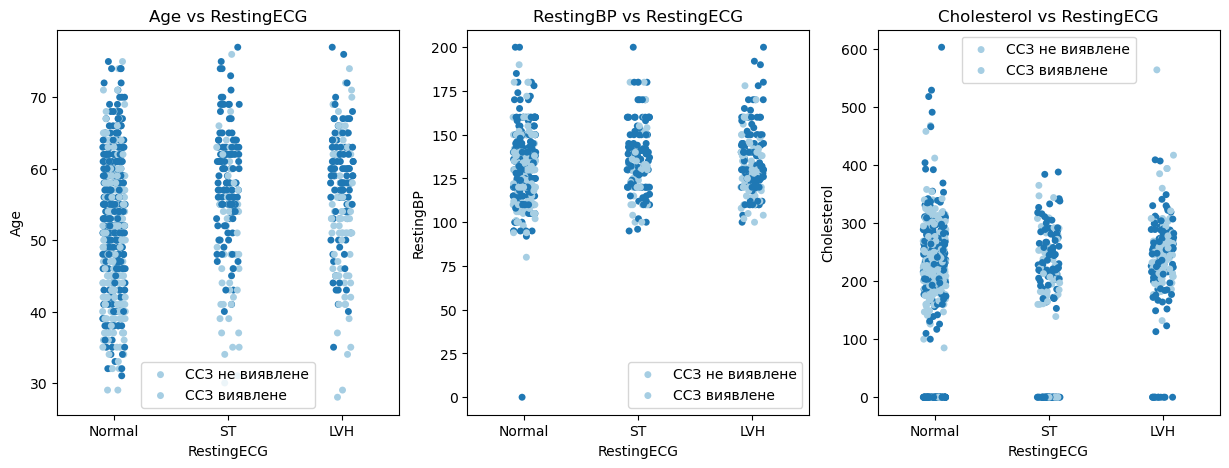

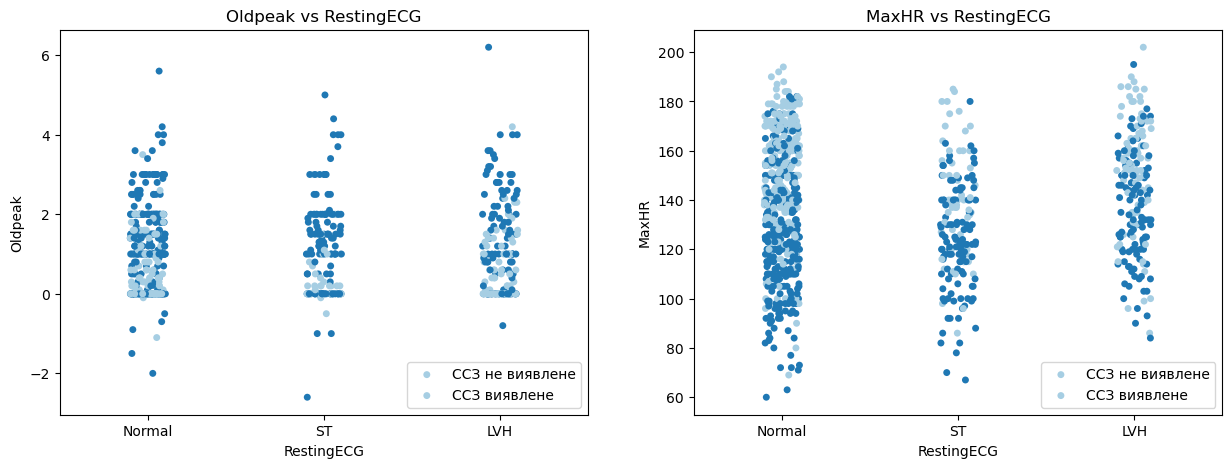

In [374]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

- Захворювання серця зі значеннями **ЕКГ спокою** **Нормальний**, **ST** і **ГЛШ** виявляються, починаючи з 30, 40 і 40 відповідно. Пацієнти старше 50 років більш схильні, ніж інші вікові групи, незалежно від показників **ЕКГ спокою**.
- Захворювання серця постійно виявляються в усіх значеннях **АТВ спокою** та **ЕКГ спокою**.
- **Значення холестерину** від 200 до 300 у поєднанні зі значенням **ST** **ЕКГ спокою** відображають групу пацієнтів із захворюваннями серця.
- Для значень **максимальної частоти серцевих скорочень** захворювання серця виявляються в щільності нижче 140 балів і **Нормальній** ЕКГ спокою. **ST** і **LVH** протягом максимальних значень пульсу відображають випадки серцевих захворювань.

#### ExerciseAngina vs Numerical Features :

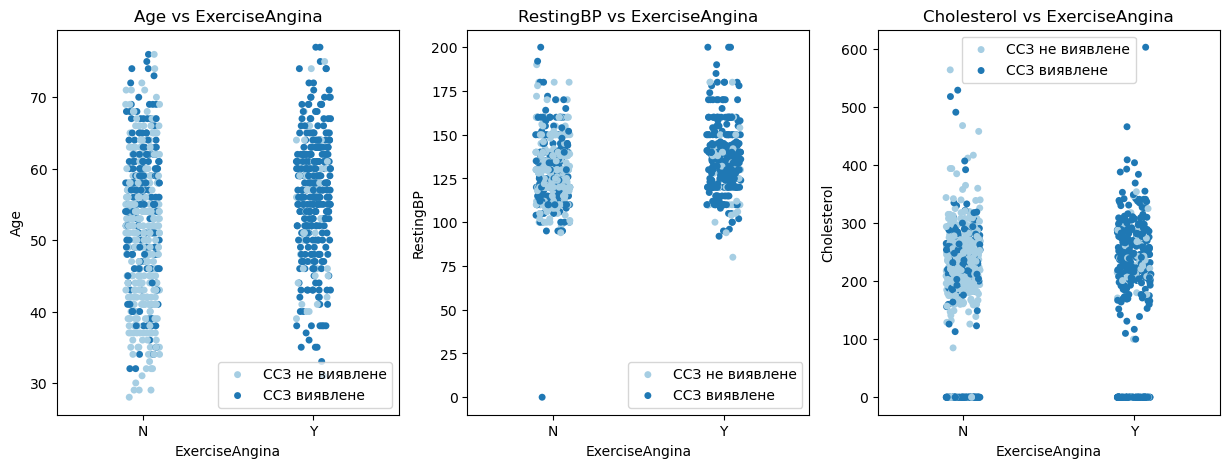

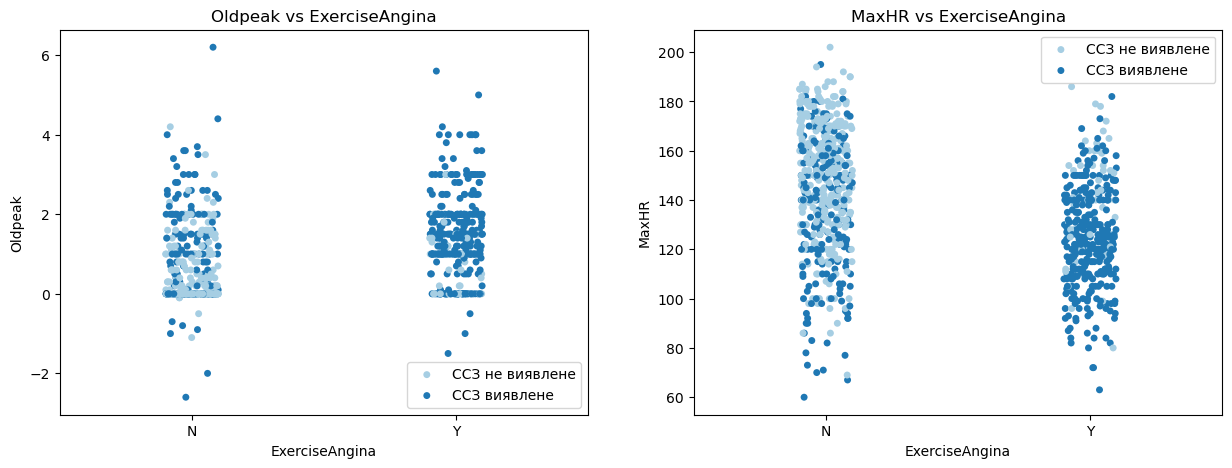

In [375]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

- Можна зробити абсолютно чітке спостереження щодо зв'язку між випадком **захворювання серця** та **стенокардії, спричиненої фізичним навантаженням**. Можна зробити висновок про позитивну кореляцію між двома ознаками по всіх числових ознаках.

#### ST_Slope vs Numerical Features :

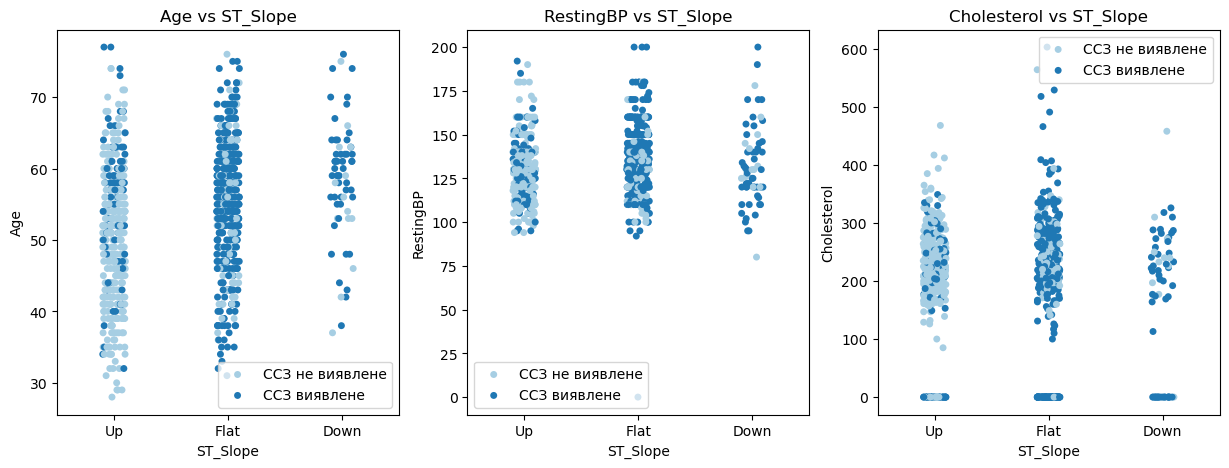

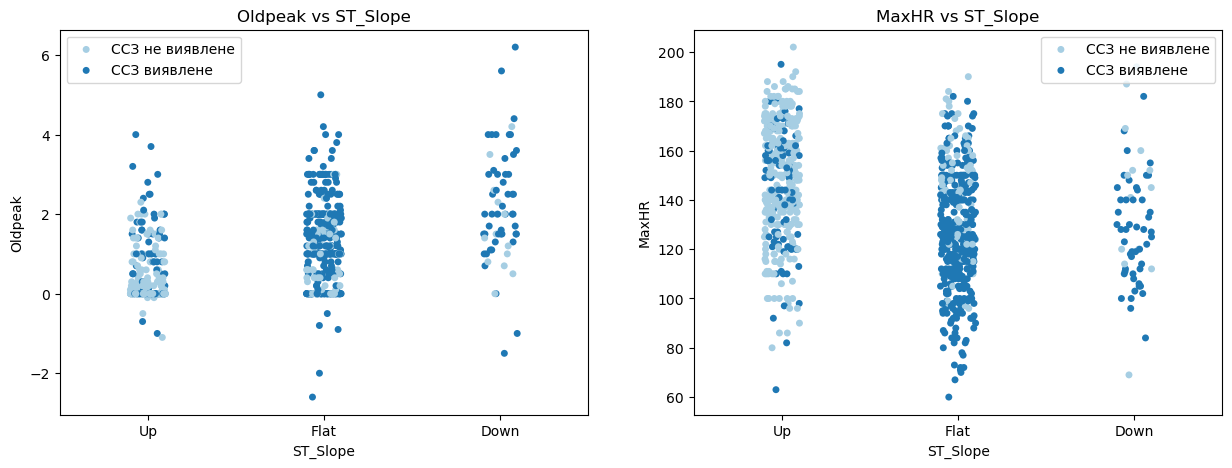

In [376]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Ще одне кристально чітке позитивне спостереження можна зробити щодо позитивної кореляції між значенням **ST_Slope** і випадками **Хвороби серця**.
- **Плоский**, **Вниз** і **Вгору** в цьому порядку відображають високу, середню та низьку ймовірність діагностування захворювань серця відповідно.

### Числові ознаки до числових ознак із цільовою змінною (захворювання серця):

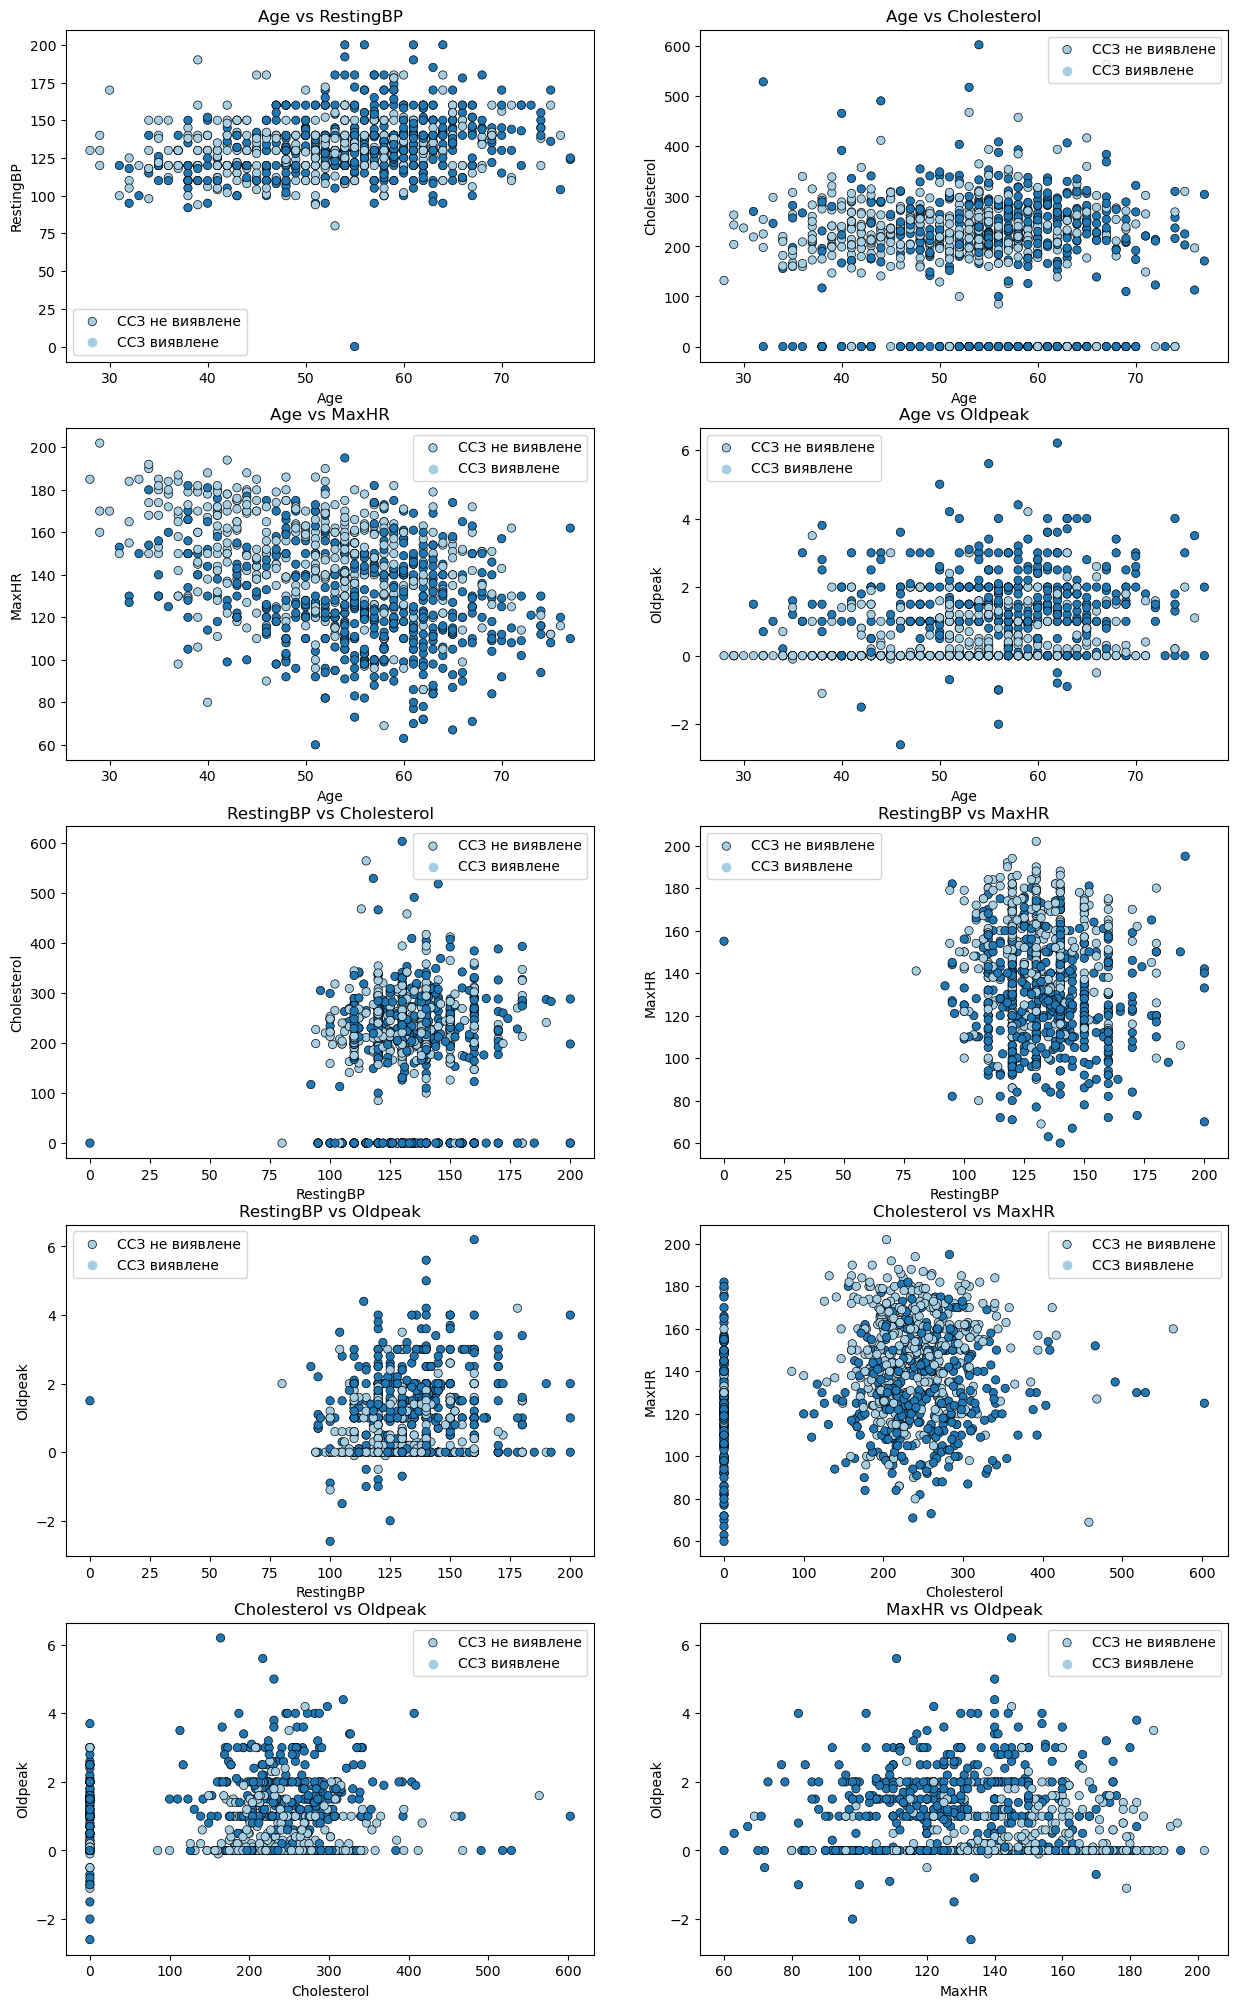

In [377]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['ССЗ не виявлене', 'ССЗ виявлене'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- Для **віку** 50+, **АТВ у спокої** від 100 до 175, рівень **холестерину** 200-300,**максимальна частота серцевих скорочень** нижче 160 і позитивні значення **oldpeak** відображаються на високому рівні випадки захворювань серця.
- Для значень **АТВ у стані спокою** 100–175 виділяє забагато пацієнтів із захворюваннями серця для всіх функцій.
- Значення **холестерину** 200-300 переважають серед випадків серцевих захворювань.
- Подібним чином значення **максимальної частоти серцевих скорочень** нижче 140 мають високу ймовірність діагностування захворювань серця.

### Значення ознак для виявлених випадків серцевих захворювань:

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    


### Масштабування даних:

In [378]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

- Модель машинного навчання не розуміє одиниці значень ознак. Він розглядає вхідні дані як просте число, але не розуміє справжнього значення цього значення. Таким чином, виникає необхідність масштабувати дані.

**Наприклад:** Вік = Роки; Натще BS = мг / дл

- У нас є 2 варіанти масштабування даних: 1) **Нормалізація** 2) **Стандартизація**. Оскільки більшість алгоритмів припускає, що дані мають нормальний (гаусівський) розподіл, **Нормалізація** виконується для функцій, дані яких не відображають нормального розподілу, а **стандартизація** виконується для функцій, які мають нормальний розподіл, де їхні значення величезні або дуже малі порівняно з іншими функціями.


- **Нормалізація**: функцію **Oldpeak** нормалізовано, оскільки вона відображала правий спотворений розподіл даних.
- **Standardizarion**: функції **Вік**, **АТК у стані спокою**, **Холестерин** і **Макс.HR** зменшено, оскільки ці функції розподілені нормально.

In [379]:
df1.describe()

Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
count 918.00 918.00         918.00     918.00       918.00     918.00   
mean   -0.00   0.79           0.78       0.00         0.00       0.23   
std     1.00   0.41           0.96       1.00         1.00       0.42   
min    -2.71   0.00           0.00      -7.15        -1.82       0.00   
25%    -0.69   1.00           0.00      -0.67        -0.23       0.00   
50%     0.05   1.00           0.00      -0.13         0.22       0.00   
75%     0.69   1.00           2.00       0.41         0.62       0.00   
max     2.49   1.00           3.00       3.65         3.70       1.00   

       RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
count      918.00 918.00          918.00   918.00    918.00        918.00  
mean         0.99   0.00            0.40     0.40      1.36          0.55  
std          0.63   1.00            0.49     0.12      0.61          0.50  
min          0.00  -3.02            0.00     0.00      0.00          0.00  
25%          1.00  -0.66            0.00     0.30      1.00          0.00  
50%          1.00   0.05            0.00     0.36      1.00          1.00  
75%          1.00   0.75            1.00     0.47      2.00          1.00  
max          2.00   2.56            1.00     1.00      2.00          1.00

### Linear Regression

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df1.drop('HeartDisease', axis=1)  # Features
y = df1['HeartDisease']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.13729077851615468
R-squared: 0.43583971386783205


### Correlation Matrix :

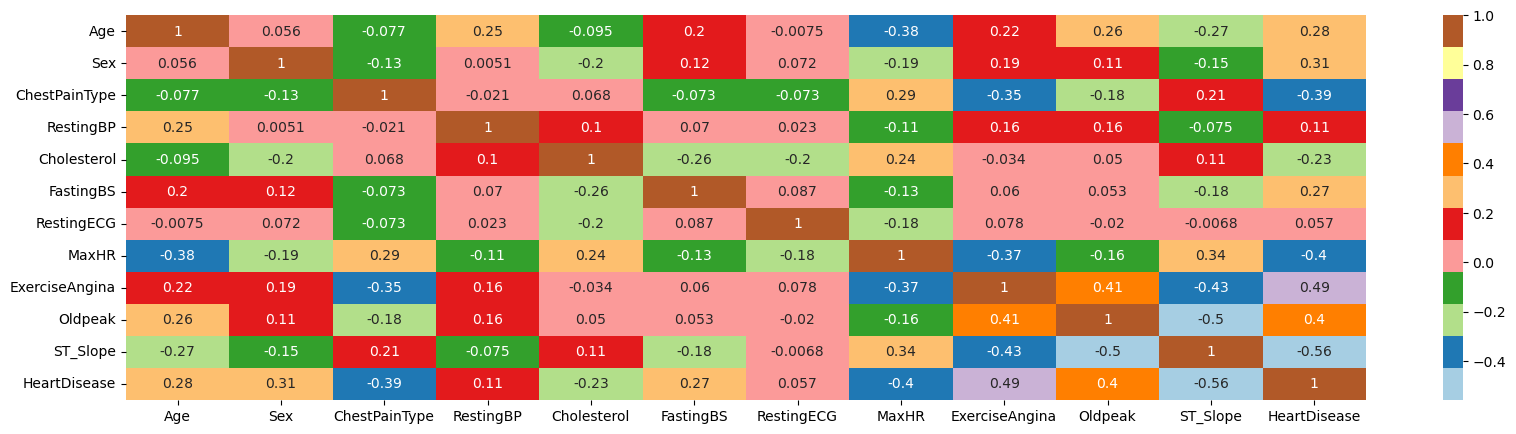

In [381]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

-Це величезна матриця з великою кількістю функцій. Перевіримо кореляцію лише щодо **HeartDisease**.

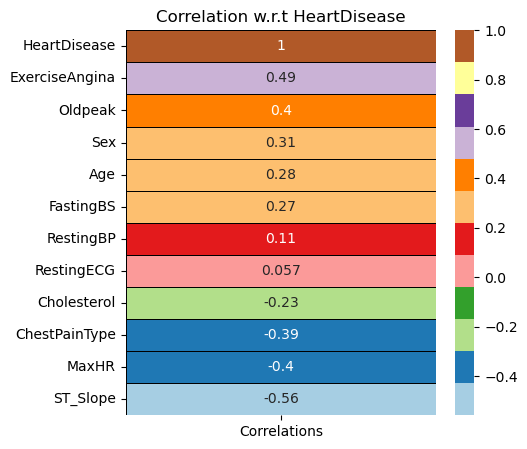

In [382]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- За винятком **RestingBP** і **RestingECG**, усі демонструють позитивний чи негативний зв’язок із **HeartDisease**.

### Вибір функції для категорійних ознак:

#### Chi Squared Test :

In [383]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

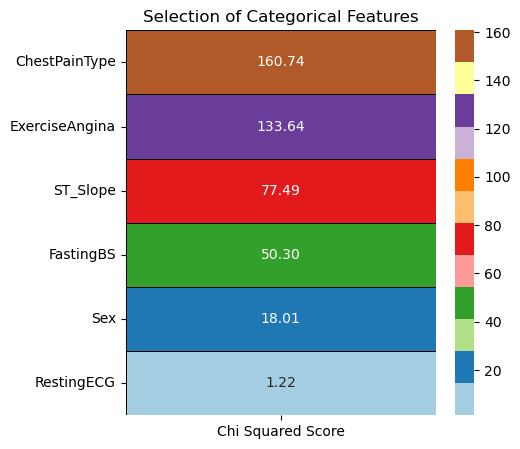

In [384]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Крім **ЕКГ спокою**, всі решта категоріальних ознак є досить важливими для прогнозування захворювань серця.

### Вибір функції для числових функцій:

#### ANOVA Test :

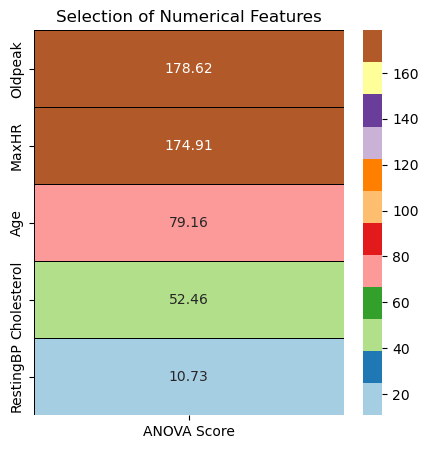

In [385]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- Ми виключимо **RestingBP** із частини моделювання й візьмемо інші функції.

In [386]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [387]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

- Вибір функцій із наведених вище проведених тестів і розділення даних на **80–20 тренувальних груп**.

In [388]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def model(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    accuracy = accuracy_score(y_test, prediction)
    print("Accuracy: {:.2%}".format(accuracy))

    cv_roc_auc = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation ROC_AUC Score: {:.2%}".format(cv_roc_auc))
    
    roc_auc = roc_auc_score(y_test, prediction)
    print("ROC_AUC Score: {:.2%}".format(roc_auc))
    
    # Calculate ROC curve manually
    fpr, tpr, _ = roc_curve(y_test, prediction)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

def model_evaluation(classifier):
    
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Logistic Regression :

In [389]:
from sklearn.linear_model import LogisticRegression

In [390]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy: 87.50%
Cross Validation ROC_AUC Score: 91.12%
ROC_AUC Score: 87.43%


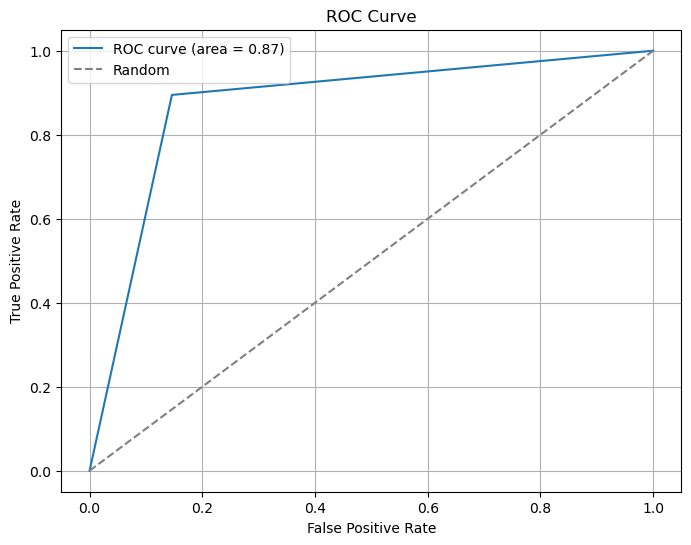

In [391]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



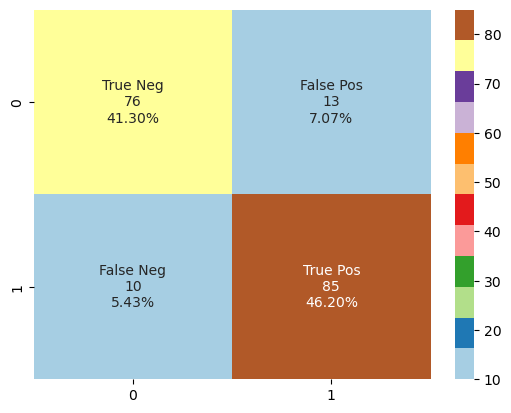

In [392]:
model_evaluation(classifier_lr)

#### 2] Support Vector Classifier :

In [393]:
from sklearn.svm import SVC

In [394]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy: 87.50%
Cross Validation ROC_AUC Score: 90.53%
ROC_AUC Score: 87.43%


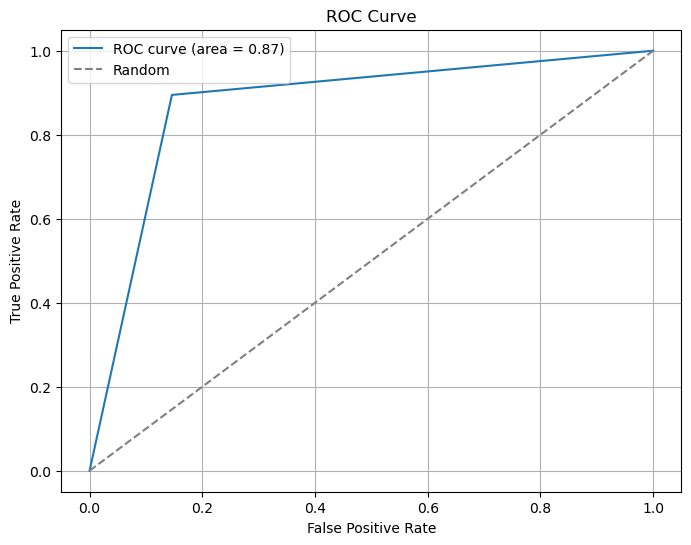

In [395]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



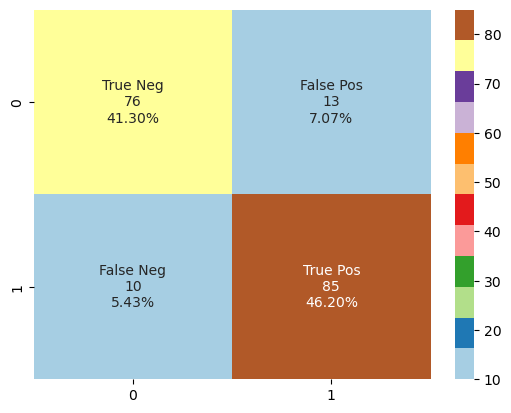

In [396]:
model_evaluation(classifier_svc)

#### 3] Decision Tree Classifier :

In [397]:
from sklearn.tree import DecisionTreeClassifier

In [398]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy: 84.78%
Cross Validation ROC_AUC Score: 89.09%
ROC_AUC Score: 84.62%


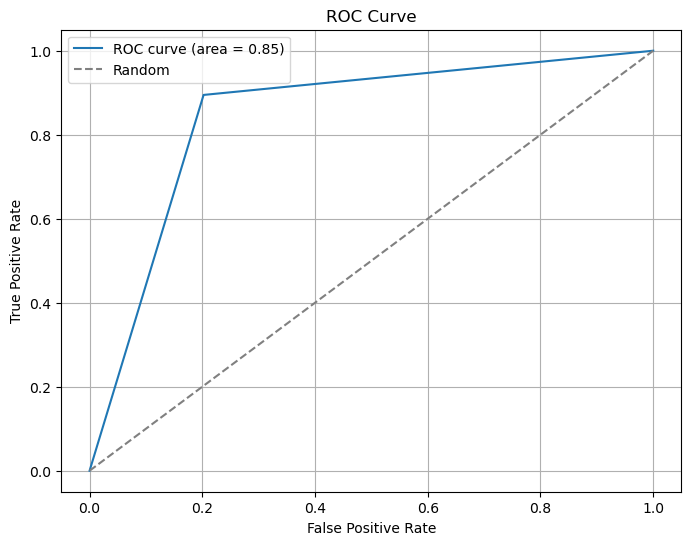

In [399]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



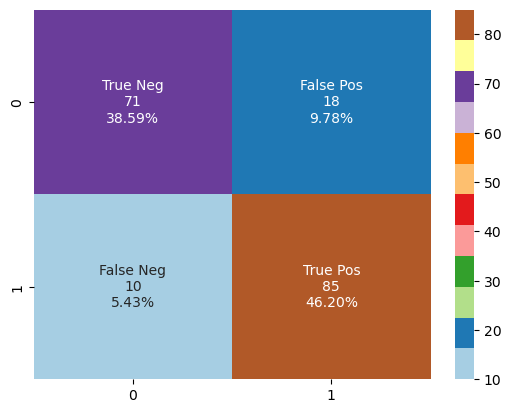

In [400]:
model_evaluation(classifier_dt)

#### 4] Random Forest Classifier :

In [401]:
from sklearn.ensemble import RandomForestClassifier

In [402]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy: 84.24%
Cross Validation ROC_AUC Score: 92.91%
ROC_AUC Score: 84.06%


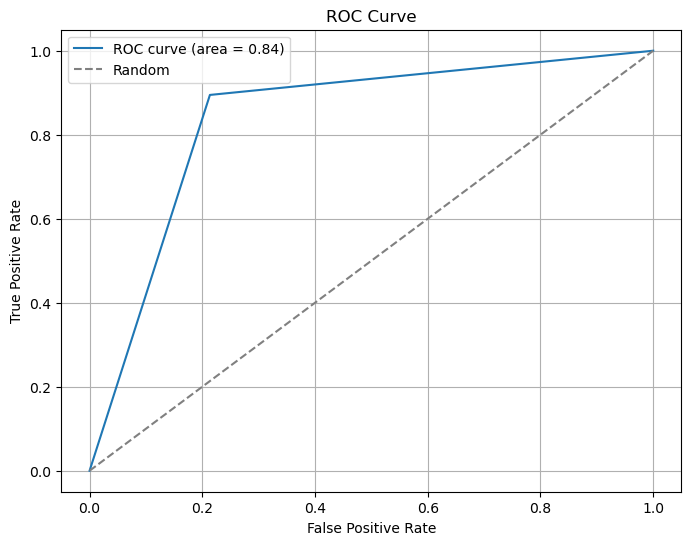

In [403]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



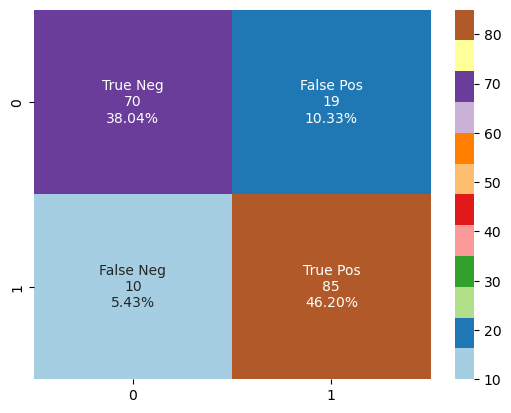

In [404]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [405]:
from sklearn.neighbors import KNeighborsClassifier

In [406]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy: 81.52%
Cross Validation ROC_AUC Score: 89.34%
ROC_AUC Score: 81.36%


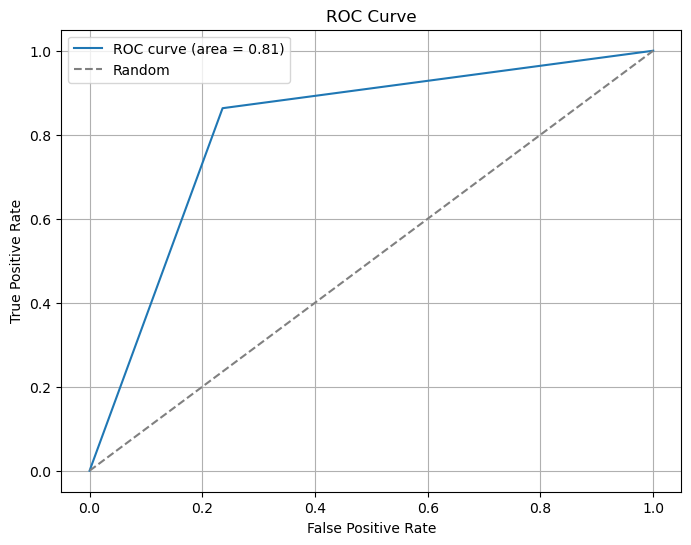

In [407]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



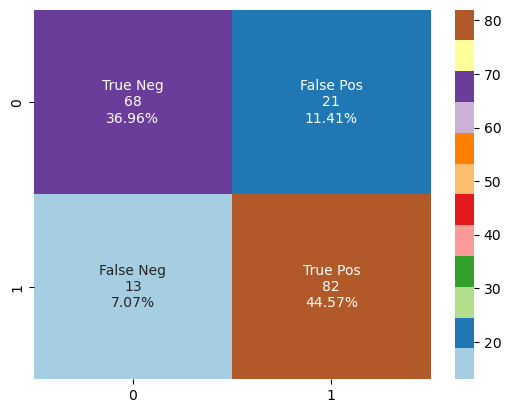

In [408]:
model_evaluation(classifier_knn)

### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|87.50%|91.12%|87.43%|
|2|Support Vector Classifier|87.50%|90.53%|87.43%|
|3|Decision Tree Classifier|84.78%|89.09%|84.62%|
|4|Random Forest Classifier|84.24%|92.91%|84.06%|
|5|K-Nearest Neighbors Classfier|81.52%|89.34%|81.36%|


- Цей набір даних чудово підходить для розуміння того, як вирішувати проблеми двійкової класифікації з поєднанням числових і категоріальних ознак.


- Експертам із предметних питань, у цьому випадку лікарям або медсестрам, можна допомогти, надавши інформацію, яка дозволить їм прийняти наступний напрямок дій.


- Для розробки функцій може здатися заплутаним порядок процесів. У цьому випадку масштабування даних було виконано перед тестом вибору функції. Ми можемо відчувати, що ми підробляємо дані, перш ніж передати їх на тести, але результати однакові незалежно від порядку процесу. (Спробуй!)


- Для цієї проблеми виявлення викидів не було зроблено, оскільки я не міг прочитати жодних статей про хвороби серця. Головною частиною стає розуміння предмета перед видаленням викидів, навіть якщо тести виявлення викидів виявилися позитивними.


- Візуалізація є ключовою. Це робить дані балакучими. Відображення поточної інформації та результатів будь-яких тестів або результатів за допомогою візуалізації стає вирішальним, оскільки це полегшує розуміння.


- Для моделювання налаштування гіперпараметрів не виконується. Це може підштовхнути продуктивність алгоритмів. Загалом продуктивність алгоритму хороша.

In [457]:
columns = ['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS',
           'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

x = df1[columns]
y = df1['HeartDisease']

test_size = 1


test_data = {
    'Age': np.random.uniform(-2.71, 2.49, test_size),
    'Sex': np.random.randint(0, 2, test_size),
    'ChestPainType': np.random.randint(0, 4, test_size),
    'Cholesterol': np.random.randint(-1.82, 3.7, test_size),
    'FastingBS': np.random.randint(0, 2, test_size),
    'MaxHR': np.random.uniform(-3.02, 2.56, test_size),
    'ExerciseAngina': np.random.randint(0, 2, test_size),
    'Oldpeak': np.random.randint(0, 2, test_size),
    'ST_Slope': np.random.randint(0, 3, test_size)
}

test_data['HeartDisease'] = np.random.randint(0, 2, test_size)

test_df = pd.DataFrame(test_data)

print(test_df.head())

test_features = columns

test_x = pd.DataFrame({feature: test_df[feature] for feature in test_features})

    Age  Sex  ChestPainType  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0 -1.12    0              1            2          1  -2.65               1   

   Oldpeak  ST_Slope  HeartDisease  
0        0         2             0  


In [458]:
sv_clf = SVC()
sv_clf.fit(x, y)
sv_clf_pred = sv_clf.predict(x)
sv_clf_acc = accuracy_score(y, sv_clf_pred)
sv_clf_acc

0.8769063180827886

In [459]:
sv_pred_test = sv_clf.predict(test_x)

sv_acc_test = accuracy_score(test_data['HeartDisease'], sv_pred_test)
print(f"Accuracy on test set: {sv_acc_test:.4f}")

cm = confusion_matrix(test_data['HeartDisease'], sv_pred_test)


names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    


# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy on test set: 1.0000


ValueError: cannot reshape array of size 1 into shape (2,2)

In [460]:
lg_clf = LogisticRegression() 
lg_clf.fit(x, y)
lg_clf_pred = lg_clf.predict(x)
lg_clf_acc = accuracy_score(y, lg_clf_pred)
lg_clf_acc

0.8540305010893247

In [461]:
lg_pred_test = lg_clf.predict(test_x)

lg_acc_test = accuracy_score(test_data['HeartDisease'], lg_pred_test)
print(f"Accuracy on test set: {lg_acc_test:.4f}")

cm = confusion_matrix(test_data['HeartDisease'], lg_pred_test)

names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix - Logistic Regression')
# plt.show()

Accuracy on test set: 1.0000


ValueError: cannot reshape array of size 1 into shape (2,2)